### Workshop Python 

Lo primero que tenemos que realizar es importar las librerías necesarias para trabajar con Python. 
Las librerías te ayudan a implementar código en tus proyectos de datos, graficar, sacar apreciaciones estadísticas y más.

In [7]:
#Importando librerías

import pandas as pd   #Pandas es para manipular dataframes 
import numpy as np   #Numpy es para manipular datos del dataframe. Pandas depende de Numpy 
import matplotlib.pyplot as plt   #Matplot es para visualizar nuestros datos
import seaborn as sns     #Seaborn es para visualizar datos más complejos
import pandas_gbq        #Esto sirve para conectar con Big Query una consulta 
import io                #Esto es para manejar el sistema de la maquina a tavés de Python
import sys              #Esto nos sirve para instalar librerias vía sistema

In [8]:
#En caso que lo ejecutemos por primera vez, ejecutamos este comando para instalar la libreria pandas_gbq

#!{sys.executable} -m pip install pandas_gbq

---------------------

#### Paso a paso 

Lo primero que debemos hacer es realizar una consulta a BigQuery

In [9]:
data = pd.io.gbq.read_gbq('''
 SELECT cdCountry, COUNT(shop_details) as shop_details, COUNT(cart_loaded) as cart_loaded, COUNT(checkout_loaded) as checkout_loaded, COUNT(transaction) as transaction
FROM `bpy---pedidosya.user_rodolfo_pardo.cvr_october`
GROUP BY 1
ORDER BY 2 DESC
''', project_id="bpy---pedidosya", dialect='standard')

In [ ]:
#Esto siempre se recomienda para guardar la información 
#No volver a correr la query es primordial
#En caso de perder la información, se trabaja con el csv


data.to_csv('data.csv')   #Guardar en la misma carpeta que trabaja el notebook
data.to_csv('/Users/rodolfo.pardo/Documents/data.csv')   #Guardar en otra carpeta 
data.to_excel('data.xlsx') #Esto guarda en ex

In [10]:
#Conociendo los primeros datos

data.head()

,cdCountry,shop_details,cart_loaded,checkout_loaded,transaction
0,Argentina,29029311,29029311,29029311,29029311
1,Chile,8982368,8982368,8982368,8982368
2,Uruguay,3643517,3643517,3643517,3643517
3,Colombia,3265206,3265206,3265206,3265206
4,Panamá,2149997,2149997,2149997,2149997


In [11]:
#Conociendo los ultimos datos 

data.tail()

,cdCountry,shop_details,cart_loaded,checkout_loaded,transaction
7,Paraguay,135264,135264,135264,135264
8,NA,13222,13222,13222,13222
9,no_country_selected_yet,2504,2504,2504,2504
10,,2418,2418,2418,2418
11,Brasil,1,1,1,1


In [14]:
#Conociendo los tipos de datos

data.dtypes

cdCountry          object
shop_details        int64
cart_loaded         int64
checkout_loaded     int64
transaction         int64
dtype: object

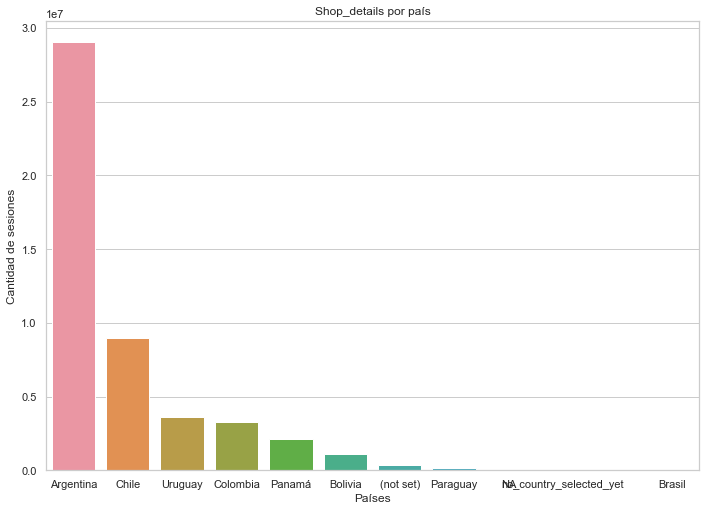

In [33]:
#Conociendo más información de nuestros datos
sns.set(style="whitegrid")

sns.barplot(x= 'cdCountry', y = 'shop_details', data = data, estimator = max)
plt.title('Shop_details por país')
plt.xlabel('Países')
plt.ylabel('Cantidad de sesiones')
plt.show()

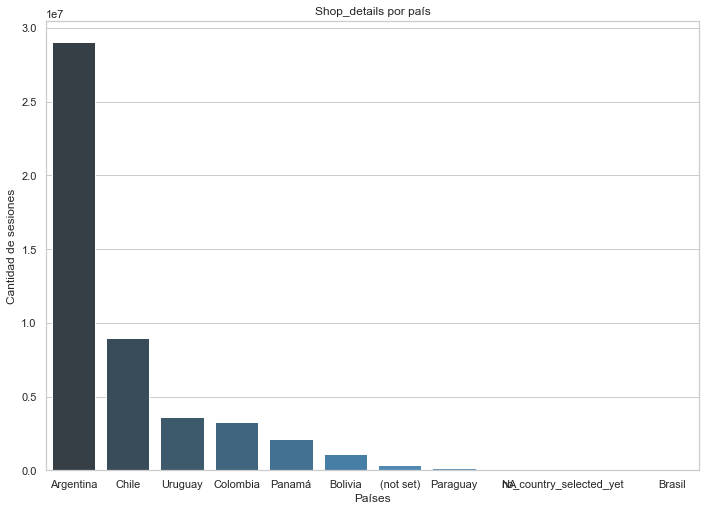

In [32]:
#Conociendo más información de nuestros datos
sns.set(style="whitegrid")

sns.barplot(x= 'cdCountry', y = 'shop_details', data = data, palette = "Blues_d")
plt.title('Shop_details por país')
plt.xlabel('Países')
plt.ylabel('Cantidad de sesiones')
plt.show()

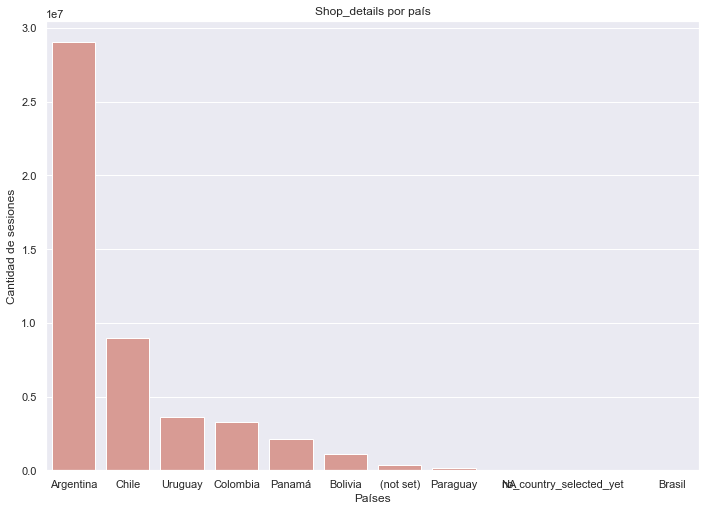

In [31]:
#Conociendo más información de nuestros datos
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.barplot(x= 'cdCountry', y = 'shop_details', data = data, color = "salmon", saturation=.5)
plt.title('Shop_details por país')
plt.xlabel('Países')
plt.ylabel('Cantidad de sesiones')
plt.show()

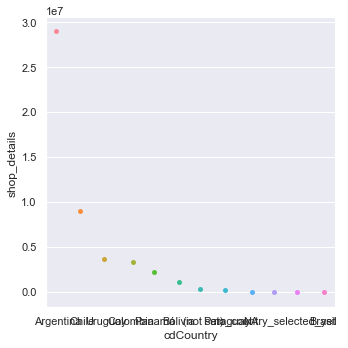

In [39]:
sns.catplot(x= 'cdCountry', y = 'shop_details', data = data)


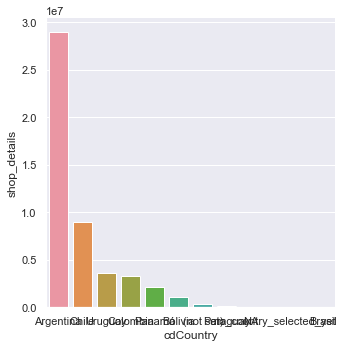

In [40]:
sns.catplot(x= 'cdCountry', y = 'shop_details', data = data, kind = "bar")